         date  rank               song                              artist  \
0  1958-08-04     1   Poor Little Fool                        Ricky Nelson   
1  1958-08-04     2           Patricia       Perez Prado And His Orchestra   
2  1958-08-04     3      Splish Splash                         Bobby Darin   
3  1958-08-04     4  Hard Headed Woman  Elvis Presley With The Jordanaires   
4  1958-08-04     5               When                         Kalin Twins   

   last-week  peak-rank  weeks-on-board  
0        NaN          1               1  
1        NaN          2               1  
2        NaN          3               1  
3        NaN          4               1  
4        NaN          5               1  
              date  rank              song  \
327177  2021-04-17    91            Nobody   
327178  2021-04-17    92           As I Am   
327179  2021-04-17    93           Lil Bit   
327180  2021-04-17    94  Drankin N Smokin   
327181  2021-04-17    95             Hello   
327

<AxesSubplot:>

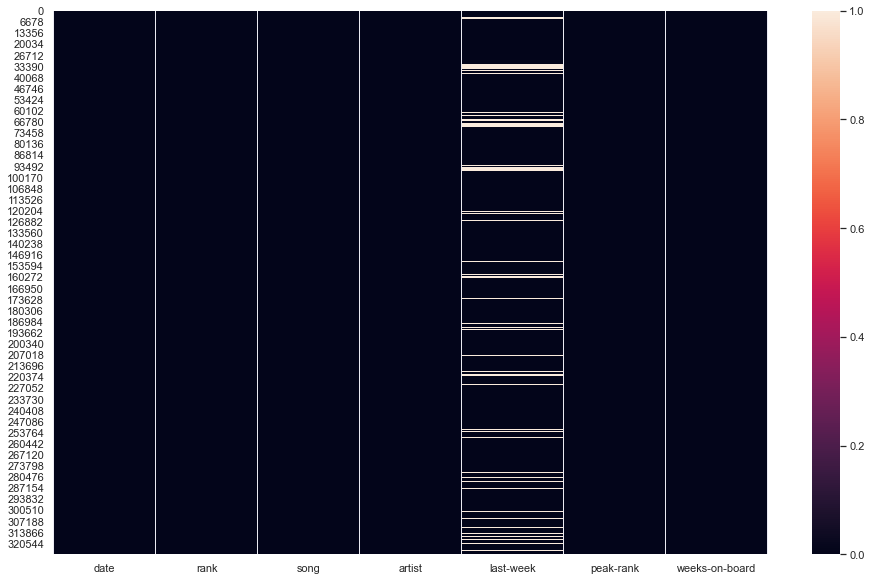

In [26]:
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib should be imported to use seaborn
import seaborn as sns
import os

"""
this is a comment
"""

df = pd.read_csv('Data/charts.csv')
a = df.head()
print(a)

b = df.tail(10)
print(b)

# Null values check
c = df.isna().sum()
print(c)

plt.figure(figsize=(16,10))
sns.heatmap(df.isna()) # null values visualization

# To save image file from seaborn, use:
# d = sns.heatmap(df.isna).get_figure()
# d.savefig('image.png')

# Alternative:
# import missingno as msno  # another way to check null values
# msno.bar(df, color = 'orchid')


In [27]:
d = df.loc[10,:]
print(d)
print(type(d))
print(d[2])

date                  1958-08-04
rank                          11
song                Ginger Bread
artist            Frankie Avalon
last-week                    NaN
peak-rank                     11
weeks-on-board                 1
Name: 10, dtype: object
<class 'pandas.core.series.Series'>
Ginger Bread


In [28]:
# Who took the most number of first place?
topartists = df[df['rank']==1] # exract the artists who ranked first place
topartists = topartists.groupby('artist').sum() # sum of the rank
topartists[['rank']].sort_values('rank', ascending = False).head(10)

,rank
artist,
Mariah Carey,65
The Beatles,54
Boyz II Men,34
Madonna,32
Drake,31
Whitney Houston,31
Michael Jackson,30
The Black Eyed Peas,28
Bee Gees,27


In [29]:
# Who appeared on the chart most frequently?
df_artist = df['artist'].value_counts().head(10)
print(df_artist)

Taylor Swift     1011
Elton John        889
Madonna           857
Kenny Chesney     758
Drake             740
Tim McGraw        731
Keith Urban       673
Stevie Wonder     659
Rod Stewart       657
Mariah Carey      621
Name: artist, dtype: int64


                                                 song  \
0                                       Old Town Road   
1                                       One Sweet Day   
2                                           Despacito   
3                                     I Gotta Feeling   
4                               I'll Make Love To You   
5                                  We Belong Together   
6                              I Will Always Love You   
7                         Macarena (Bayside Boys Mix)   
8   Candle In The Wind 1997/Something About The Wa...   
9                                        Uptown Funk!   
10                 End Of The Road (From "Boomerang")   
11                                    The Boy Is Mine   
12                                      Blurred Lines   
13                                             Smooth   
14                                             Closer   

                                               artist  counts  
0                 Lil N

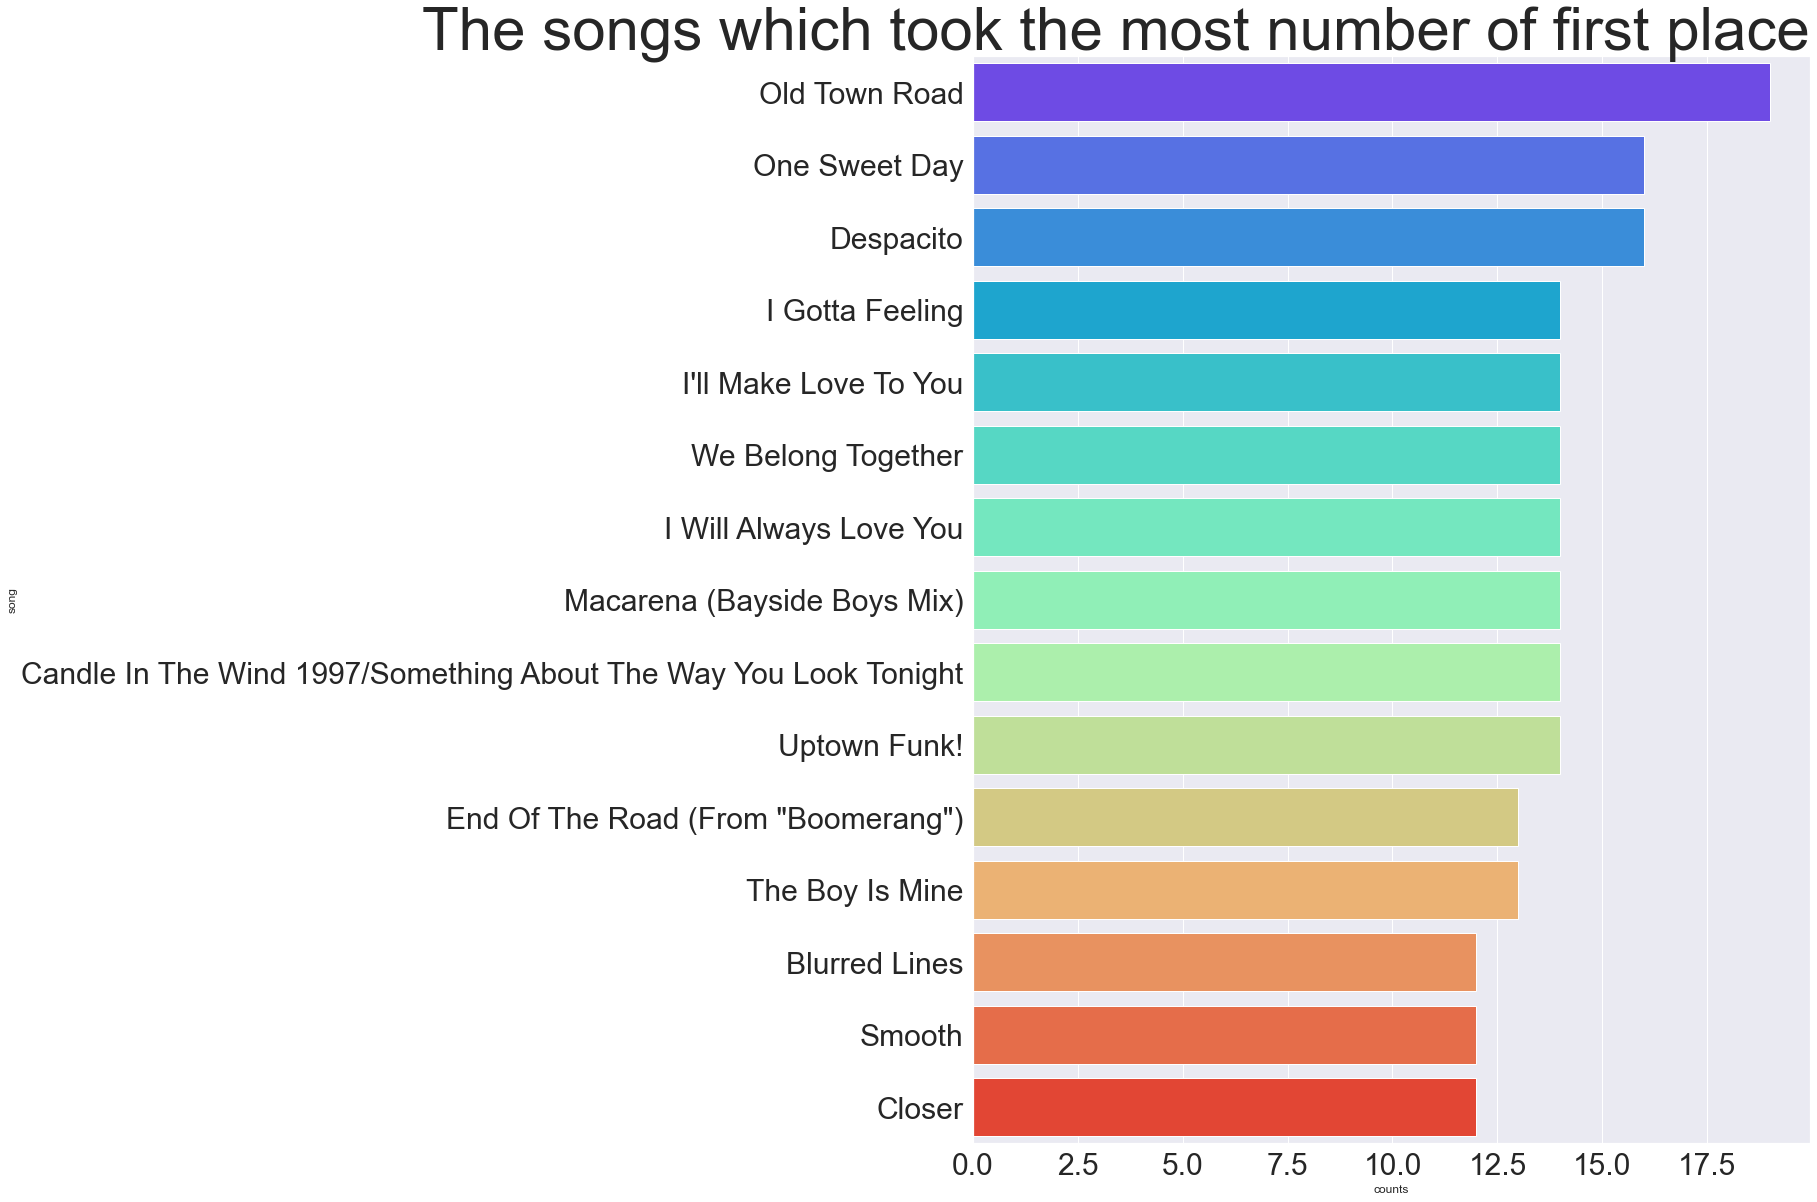

In [30]:
# Which songs took the most number of first place?
topsongs = df[df['rank']==1] # extract the songs which ranked first place
topsongs = topsongs[['song','artist']].value_counts() 
topsongs = topsongs.reset_index(name='counts').head(15) # reset index name
print(topsongs)

plt.figure(figsize = (15, 20))
sns.barplot(data = topsongs, x = 'counts', y = 'song', palette = 'rainbow')
plt.yticks(fontsize = 30)
plt.xticks(fontsize = 30)
plt.title('The songs which took the most number of first place', fontsize = 60, loc='right')
plt.show()

In [31]:
# Which songs appeared on the chart for the longest time?
longest = df[['song','artist']].value_counts()
longest = longest.reset_index(name='max')
print(longest.head(15))

                                   song  \
0                           Radioactive   
1                                  Sail   
2                             I'm Yours   
3                       Blinding Lights   
4                         How Do I Live   
5                     Party Rock Anthem   
6                        Counting Stars   
7                   Rolling In The Deep   
8   Foolish Games/You Were Meant For Me   
9                      Before He Cheats   
10                               Ho Hey   
11                           You And Me   
12                               I Hope   
13                               Demons   
14                              Circles   

                                       artist  max  
0                             Imagine Dragons   87  
1                                  AWOLNATION   79  
2                                  Jason Mraz   76  
3                                  The Weeknd   70  
4                                 LeAnn Rimes 

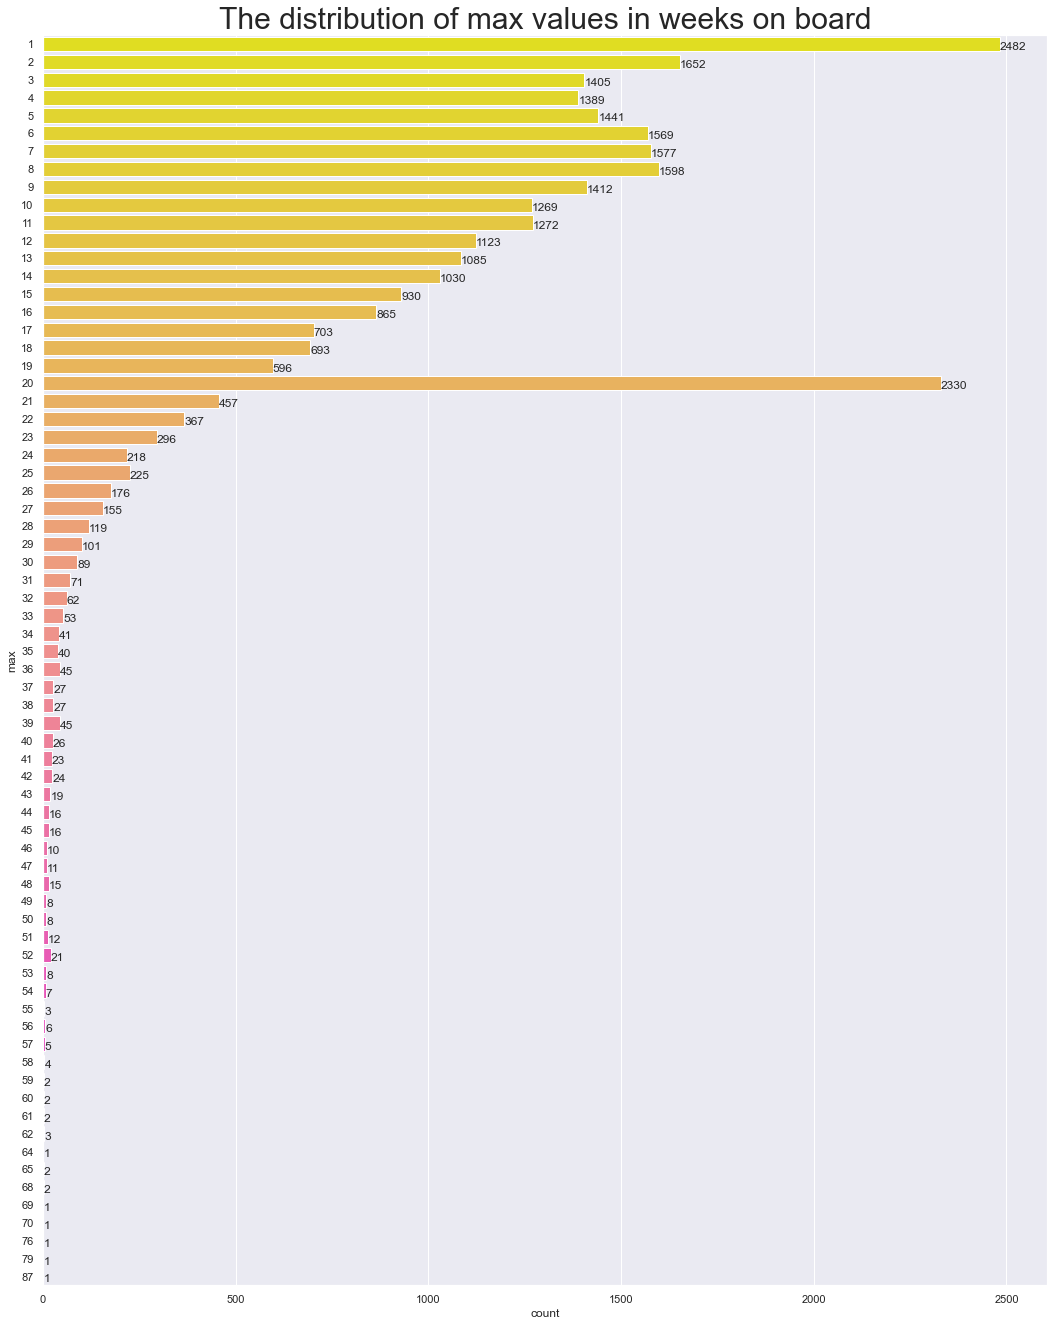

In [32]:
# the distribution of max values in 'weeks on board'.

plt.rcParams["figure.figsize"]=(18,23)
sns.set(style="darkgrid")
ax = sns.countplot(y='max', palette="spring_r", data=longest)
plt.title('The distribution of max values in weeks on board', fontsize=30)

# annotaion
for p in ax.patches:
        value = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() - 0.07
        ax.annotate(value, (x, y))
plt.show()

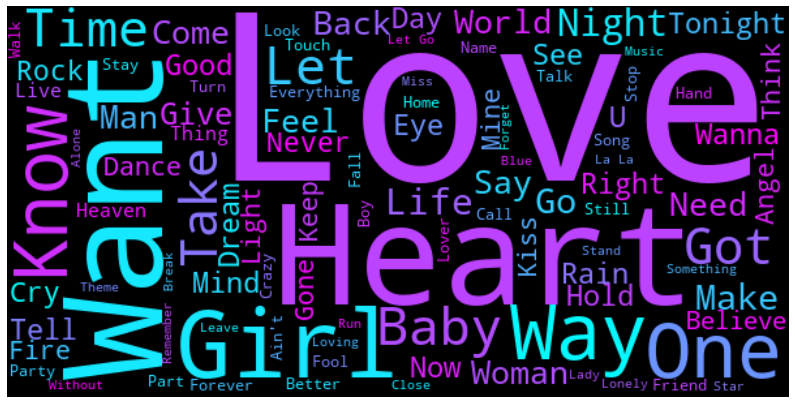

In [33]:
# Wordcloud of the song titles

# import wordcloud
from PIL import Image as im
from wordcloud import WordCloud,STOPWORDS

plt.subplots(figsize=(14,10))
wc = WordCloud(max_words=100,
               stopwords=STOPWORDS, max_font_size=180,
               random_state=42, width=600, height=300, colormap='cool')
wc.generate(' '.join(df['song']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
cities = pd.DataFrame([['Sacramemmnto', 'Californiaa'], ['Miami', 'Florida']], columns=['City', 'State'])
cities.to_csv('Data/cities.csv', index=False)